### Objective:

* Predict whether a liability customer will buy a personal loan or not.
* Find out most siginifcant varibales.
* Find out the target customer segment.

#### Dataset:
* ID: Customer ID.
* Age: Customer’s age in completed years.
* Experience: No of years of professional experience.
* Income: Annual income of the customer (in thousand dollars).
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer.
* CCAvg: Avg. spending on credit cards per month (in thousand dollars).
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional.
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Bank?


### Import the necessary packages

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

### Reading the Data

In [139]:
data = pd.read_csv('Loan_Modelling.csv')

In [140]:
#copying the data to another varaible to avoid any chnages to original data
df = data.copy()

### View the first and last 5 rows of the dataset

In [141]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [142]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


**Observations**

* We can drop ID as we can work with default ID.

In [143]:
df.drop('ID',axis=1, inplace=True) # to drop the coloumn'ID' .

In [144]:
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


### Shape of the Dataset

In [145]:
df.shape

(5000, 13)

**Observations**

* Dataset has 5000 rows and 13 coloumns

### Dataframe Info

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


**Observations**

* All data types are in int64 except CCAvg, which is in float64.
* Personal_Loan is the dependent variable and a class variable, and it should convert into a categorical variable for further analysis.
* Securities_Account, CD_Account, Online and Creditcard are class variables and should also convert into categorical variables.

### Datatypes conversion

In [147]:
df['Personal_Loan']=df.Personal_Loan.astype('category')
df['Securities_Account']=df.Securities_Account.astype('category')
df['CD_Account']=df.CD_Account.astype('category')
df['Online'] = df.Online.astype('category')
df['CreditCard'] = df.CreditCard.astype('category')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(7)
memory usage: 337.5 KB


**Observations**

* Converted Personal_Loan, Securities_Account, CD_Account, Online and Creditcard variables into categorical type.

### Missing Values

In [149]:
df.isnull().sum() # to findout NULL values

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observations**

* There are no missing values in the data.

### Duplicate Values

In [150]:
df[df.duplicated()].count()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observations**

* There are no duplicate values in the data.

### Statistical Summary 

In [151]:
df.describe(include='all')

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
unique,nan,nan,nan,nan,nan,nan,nan,nan,2.00,2.00,2.00,2.00,2.00
top,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,1.00,0.00
freq,nan,nan,nan,nan,nan,nan,nan,nan,4520.00,4478.00,4698.00,2984.00,3530.00
mean,45.34,20.10,73.77,93169.26,2.40,1.94,1.88,56.50,nan,nan,nan,nan,nan
std,11.46,11.47,46.03,1759.46,1.15,1.75,0.84,101.71,nan,nan,nan,nan,nan
min,23.00,-3.00,8.00,90005.00,1.00,0.00,1.00,0.00,nan,nan,nan,nan,nan
25%,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,nan,nan,nan,nan,nan
50%,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,nan,nan,nan,nan,nan
75%,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,nan,nan,nan,nan,nan


**Observations**

* The average age of customers in our dataset is 45.33 years.
* The average working experience of customers in our data set is 20.10 years.
* Very few customers have Securities_Account and CD_Account with the bank.
* $1937 is the average amount customers are spending on credit cards per month.

In [152]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

**Observations**

* ZIPCode has the highest number of unique values, followed by Mortgage and Income.

### Univariate Analysis

#### Distribution of Numerical Variables

In [153]:
def dist_plot(var,figsize=(5,5), bins = None):
    ax = sns.distplot(var) # distplot will be created
    ax.axvline(np.mean(var), color='red', linestyle='--') # Add mean to the histogram
    ax.axvline(np.median(var), color='green', linestyle='-') # Add median to the histogram

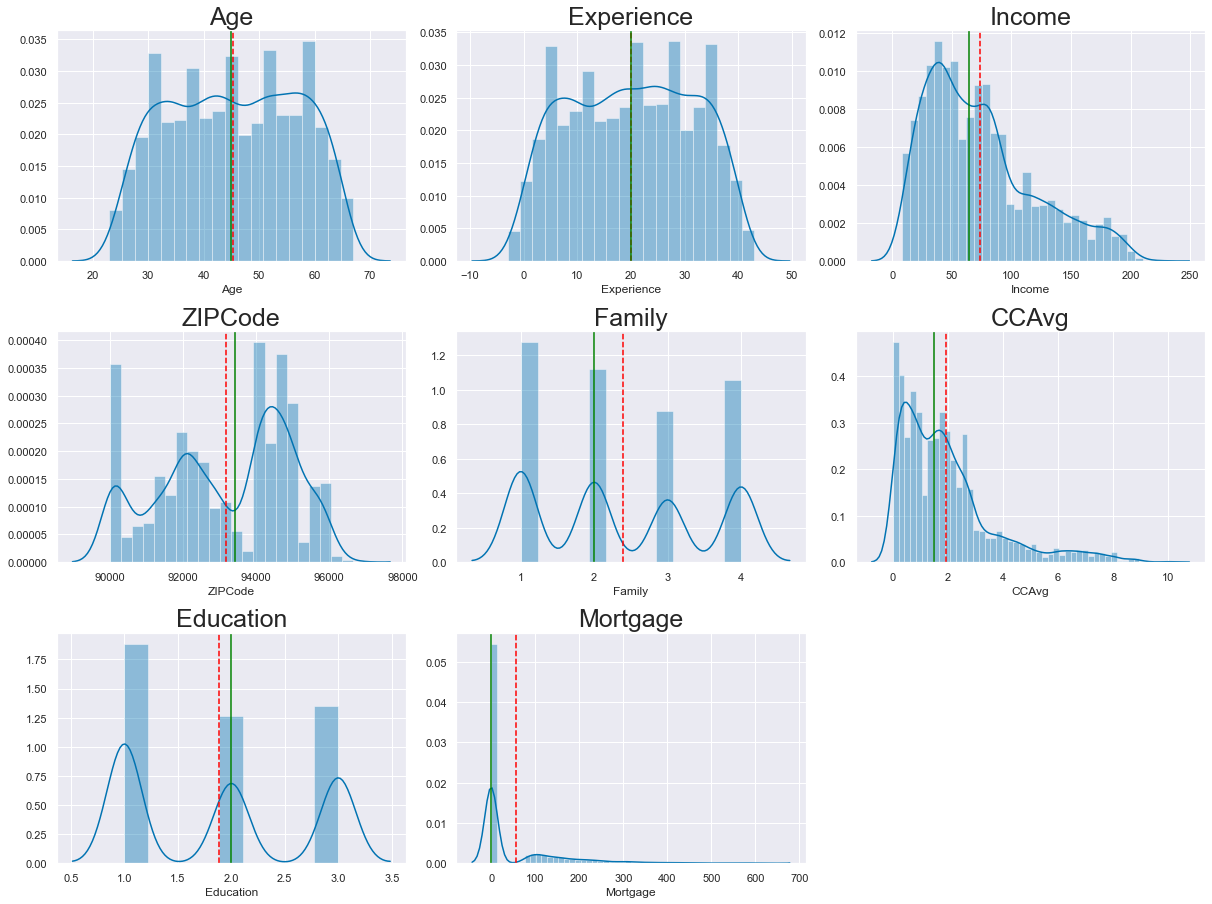

In [154]:
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    dist_plot(df[all_col[i]])
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

**Observations**

* Mean and median are identical in both Age and Experience variables, indicating some normal distribution.
* Income variable is right skewed, indicating most of the customers are in between 8K and 100k Income.
* The Income variable is right-skewed, indicating most of the customers are between 8K and 100k Income.
* CCAvg and Mortgage variables are also right-skewed.

### Detecting Outliers

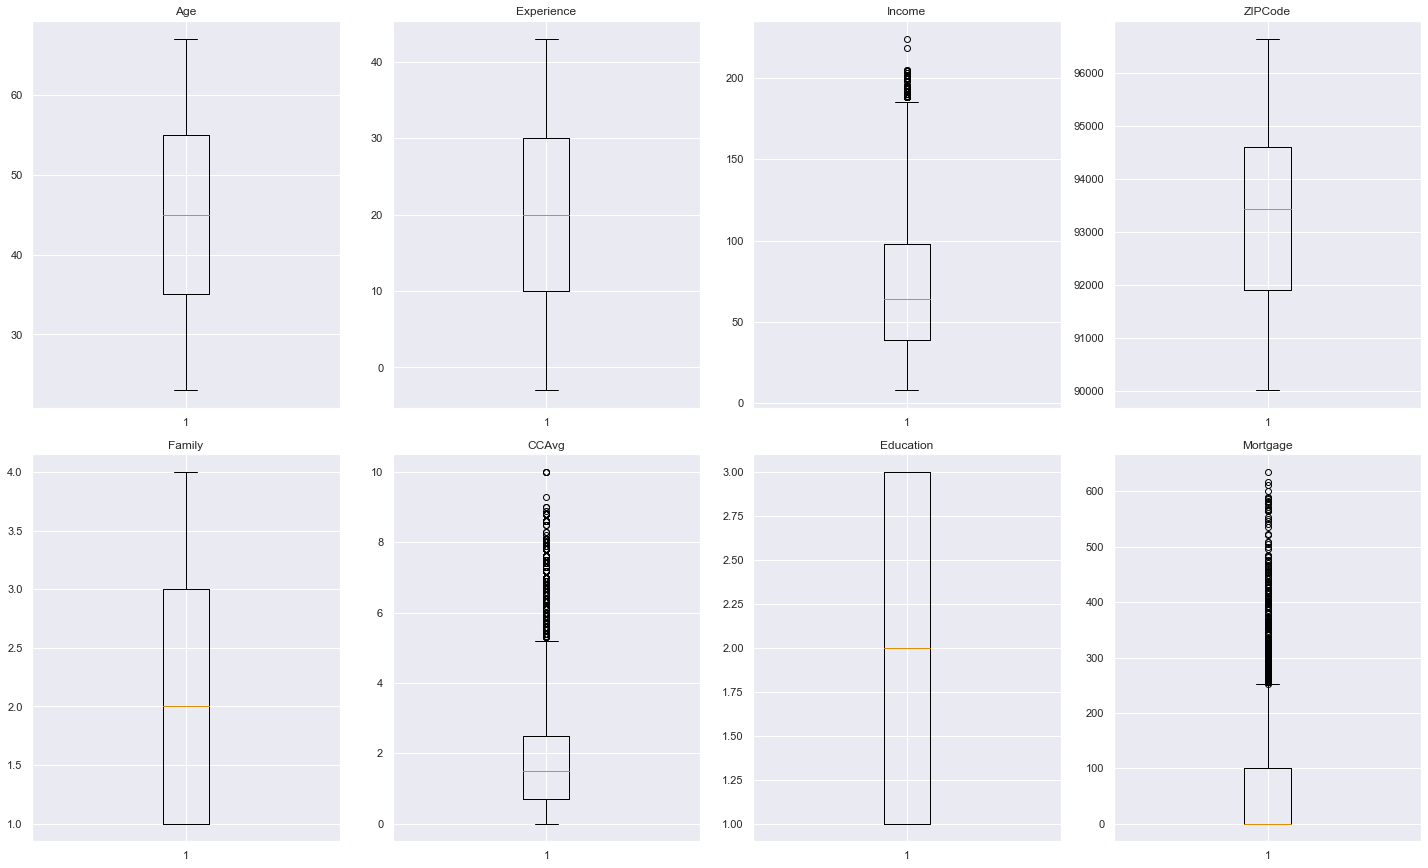

In [155]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))
for i, variable in enumerate(all_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

**Observations**

*  Income, CCAvg and Mortgage variables have outliers and need to treat before building the model.

### Univariate Analysis on Categorical Variables

In [156]:
def bar_perc(plot,var): # Creating a function for countplot.
   
    total = len(var)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

#### Personal Loan acceptance

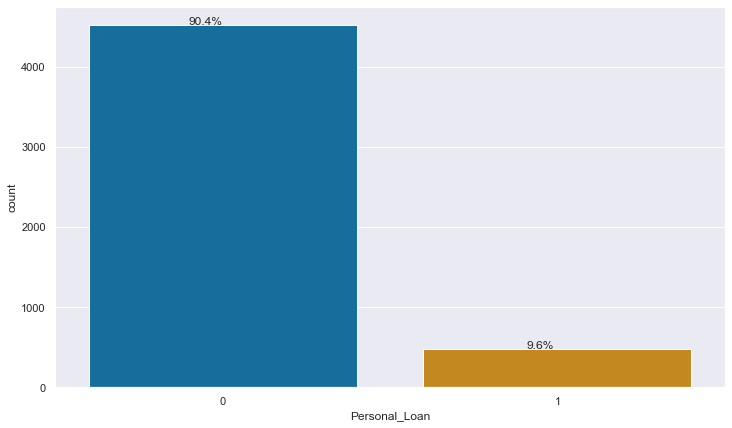

In [157]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["Personal_Loan"])
bar_perc(ax,df["Personal_Loan"])

**Observations**

* Only 9.6% of the customers have accepted the personal loan in the last campaign.

#### Securities_Account

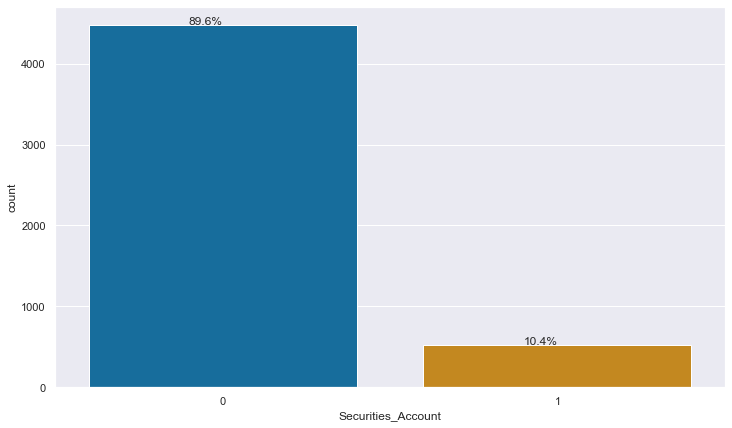

In [158]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["Securities_Account"])
bar_perc(ax,df["Securities_Account"])

**Observations**

* Only 10.4% of the customers have securities account with the bank.

#### CD_Account

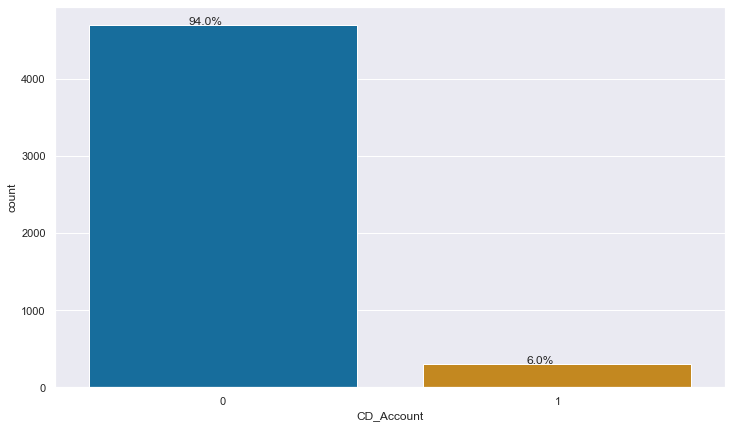

In [159]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["CD_Account"])
bar_perc(ax,df["CD_Account"])

**Observations**

* Only 6% of the customers have a Certificate of Deposit account with the bank.

#### Online

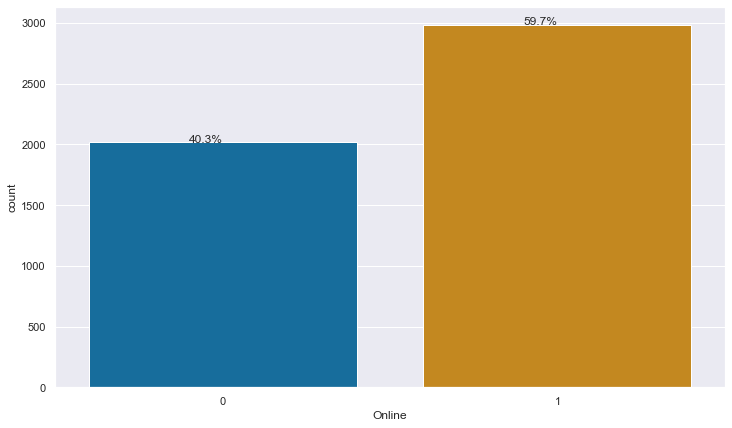

In [160]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["Online"])
bar_perc(ax,df["Online"])

**Observations**

* 59.7% of the customers are using internet banking facilities.

#### CreditCard

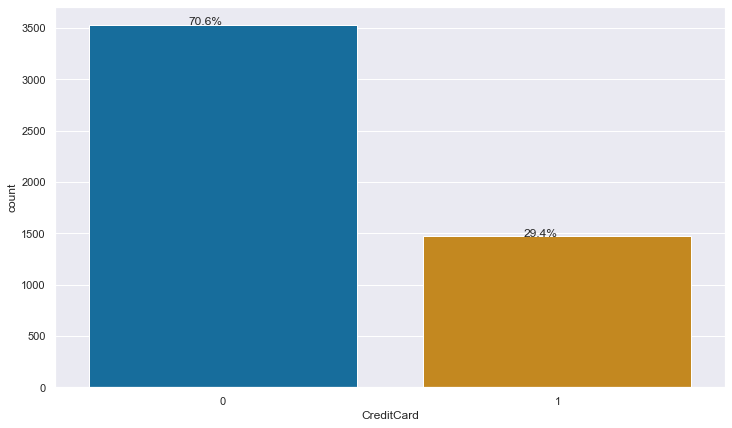

In [161]:
plt.figure(figsize=(12,7))
ax = sns.countplot(df["CreditCard"])
bar_perc(ax,df["CreditCard"])

**Observations**

* Only 29.4% of the customers are using bank issues credit cards.

### Bivariate and Multivariate Analysis

<Figure size 864x504 with 0 Axes>

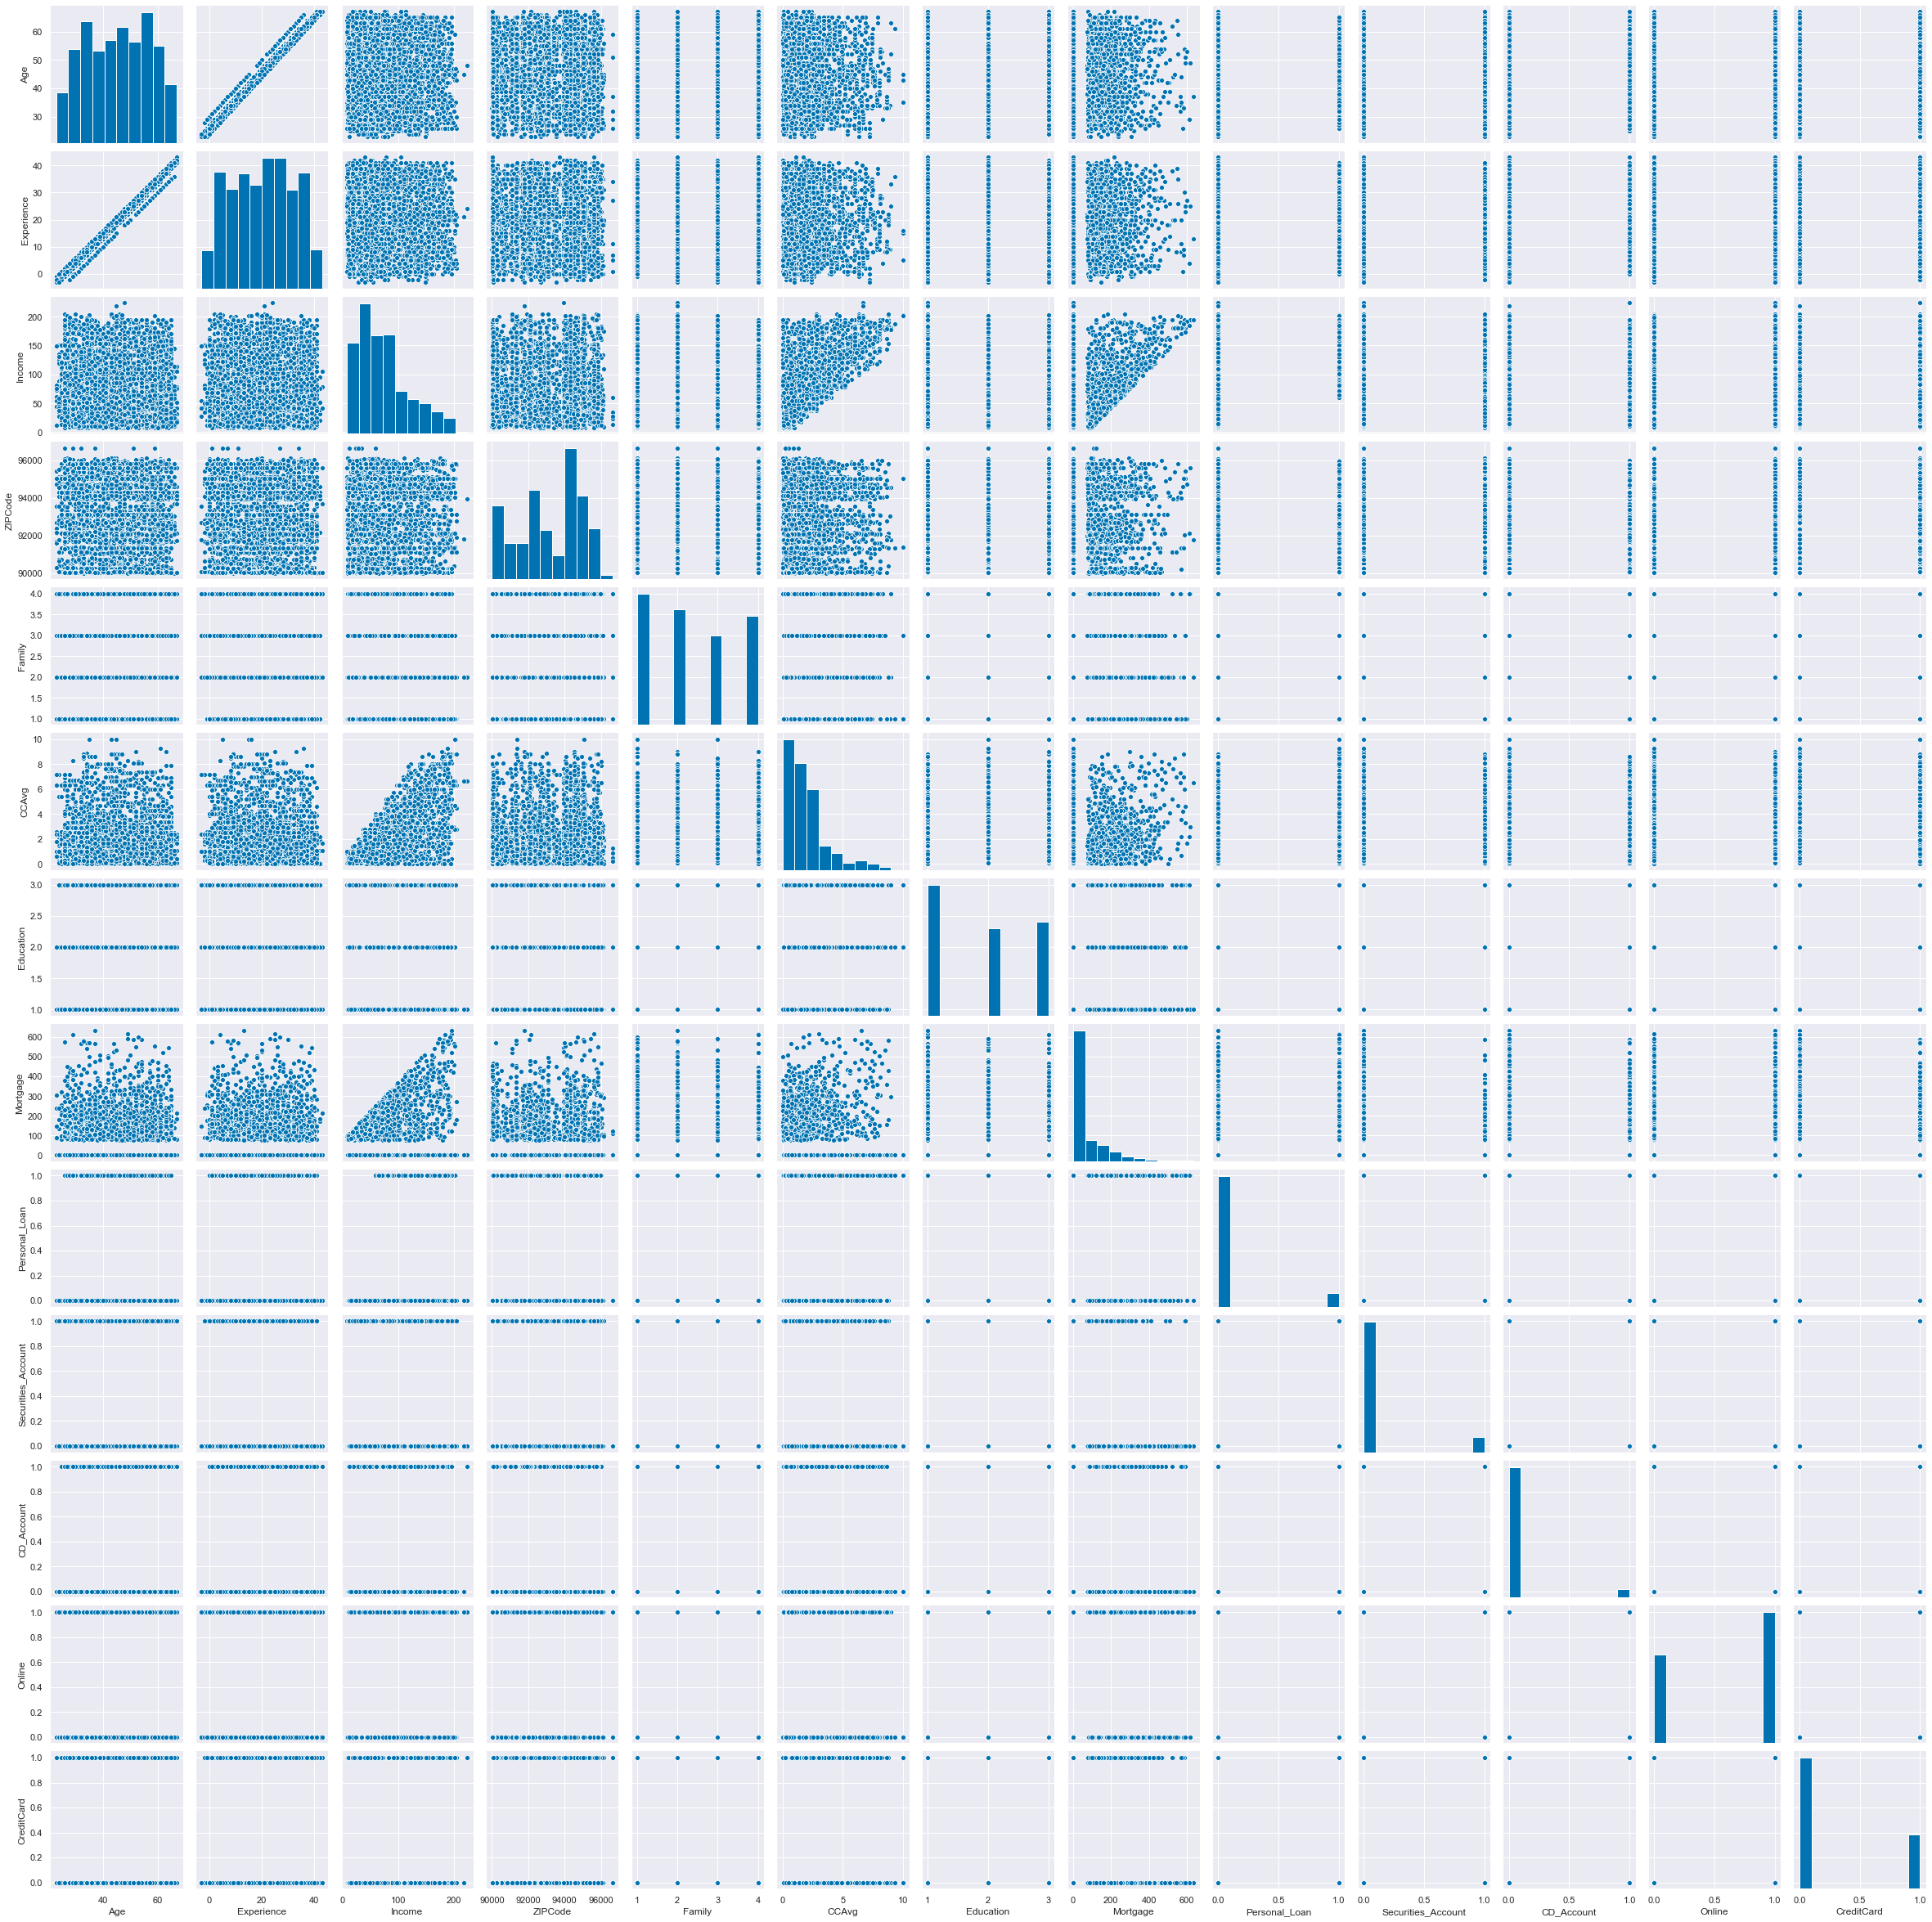

In [162]:
plt.figure(figsize=(12,7))
sns.pairplot(df)

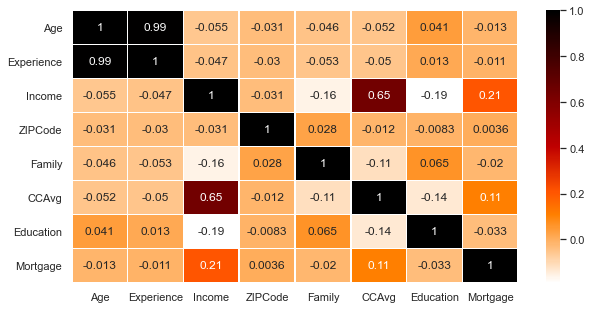

In [163]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=.5,cmap="gist_heat_r")

**Observations**

* Age and Experience variables are positively highly correlated.
* Income and CCAvg also have a high correlation. However, it has very little correlation with Mortgage.

### Creating Bins for Age and Income Variables

In [164]:
bins = [23,35,55,67]#creating bins for Age
labels=['23-35 Age','36-55 Age','46-67 Age'] # Creating labels to assign it to bins

In [165]:
df['Age Category'] = pd.cut(df['Age'],bins,labels=labels)#Creating new column and adding it in to the dataset

In [166]:
bins = [0,20,50,120,224] #creating bins for Income
labels=['Below Poverty','Low Income','Middle Class','High Income'] #Creating labels to assign it to bins

In [167]:
df['Income Category'] = pd.cut(df['Income'],bins,labels=labels)#Creating new column and adding it in to the dataset

#### Education VS Income

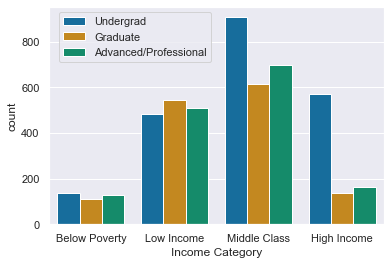

In [168]:
ex = sns.countplot(x="Income Category",hue="Education", data=df)
legend_labels, _= ex.get_legend_handles_labels()
ex.legend(legend_labels, ['Undergrad','Graduate','Advanced/Professional'],
          bbox_to_anchor=(.5,1))

**Observations**

* Most of the customers are belong to the middle-class income category, followed by low income, high income and below poverty income categories.

* Except in the low-income category, undergraduate customers are high in the other three categories, followed by Advanced/Professional and Graduates.

#### Income VS Family

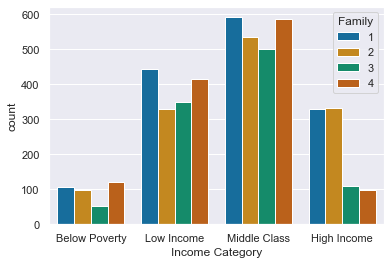

In [169]:
sns.countplot(x="Income Category",hue="Family", data=df)

**Observations**

* Customer's family size of one and four stood in first and second place in the middle-class income category.

* In both High and below poverty income categories, customers' family sizes of one and two are equal in number.

#### Income VS Age

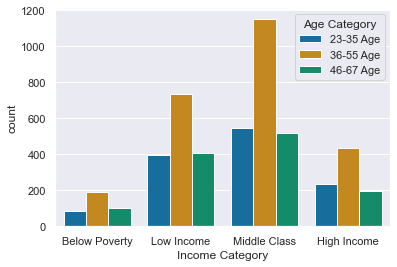

In [170]:
sns.countplot(x="Income Category",hue="Age Category", data=df)

**Observations**

* The majority of the bank customers are between the 36-55 age group in which most of them from the middle-class income category.

#### Age VS Family

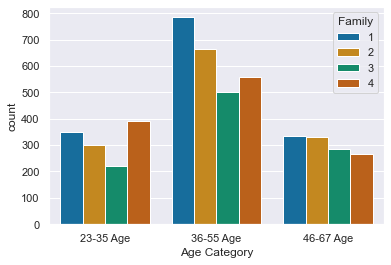

In [171]:
sns.countplot(x="Age Category",hue="Family", data=df)

**Observations**

* The majority of customers in the age group, 36-55, are with a family size of one followed by a family size of two, four and three.

#### Age VS Education

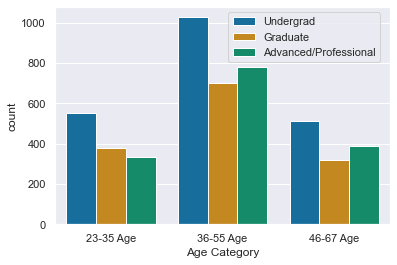

In [172]:
px = sns.countplot(x="Age Category",hue="Education", data=df)
legend_labels, _= px.get_legend_handles_labels()
px.legend(legend_labels, ['Undergrad','Graduate','Advanced/Professional'], 
          bbox_to_anchor=(.5,1))

**Observations**

* The majority of customers in the age group, 36-67, are Undergraduates, followed by Advanced/Professional and Graduates.

* The majority of customers in the age group, 23-35, are Undergraduates, followed by Graduates and Advanced/Professional.

#### Income VS CCAvg

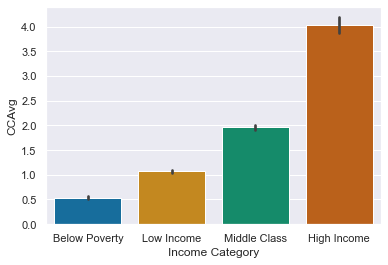

In [173]:
sns.barplot(x="Income Category",y="CCAvg",data=df)

**Observations**

* High-income category customers spend more on credit cards per month, followed by Middle-class, low-income, and below-poverty-income customers.

#### Income VS Mortgage

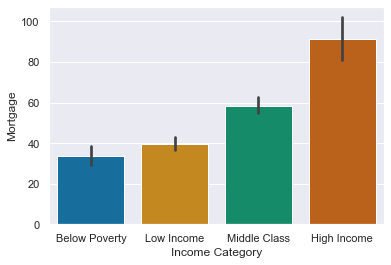

In [174]:
sns.barplot(x="Income Category",y="Mortgage",data=df)

**Observations**

* The majority of the customers with mortgages belong to the high-income category, followed by Middle-class, low-income, and below-poverty-income customers.

#### Income VS Securities Account

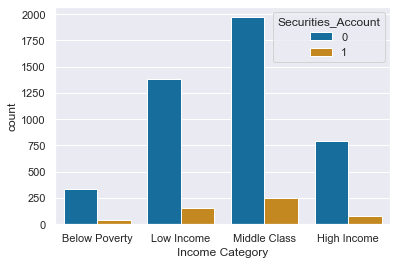

In [175]:
sns.countplot(x="Income Category",hue="Securities_Account",data=df)

**Observations**

* The majority of customers do not have a Securities account with the bank.  However, most customers who ever have a securities account with a bank belong to the middle-class income category.

#### Income VS CD_Account

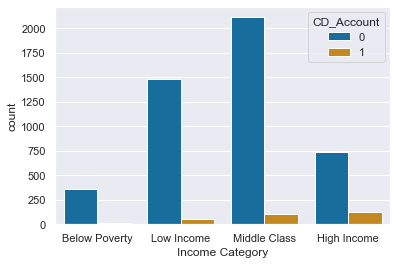

In [176]:
sns.countplot(x="Income Category",hue="CD_Account",data=df)

**Observations**

* The majority of customers do not have a CD_Account with the bank.  However, most customers who ever have a CD_Account within the bank belong to the High-income category, followed by Middle class and low-income customers.

* None of the below poverty income customers have a CD_Account in the bank.

#### Income VS Online

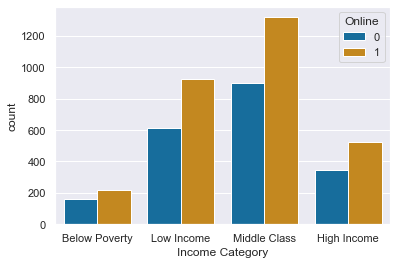

In [177]:
sns.countplot(x="Income Category",hue="Online",data=df)

**Observations**

* The majority of customers using online banking services.  Most customers who use online banking services belong to the Middle-income category, followed by Low_income, Hig-income and below poverty customers.


#### Income VS CreditCard

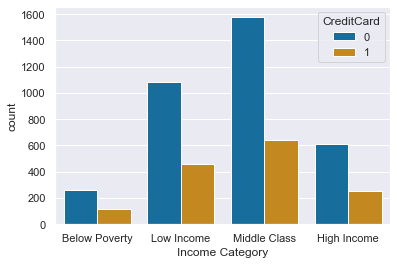

In [178]:
sns.countplot(x="Income Category",hue="CreditCard",data=df)

**Observations**

* Among all income categories, Most customers who use bank-issued credit cards belong to middle-class income customers, followed by Low-income, High-income and below-poverty customers.


#### Age VS Experience VS Income

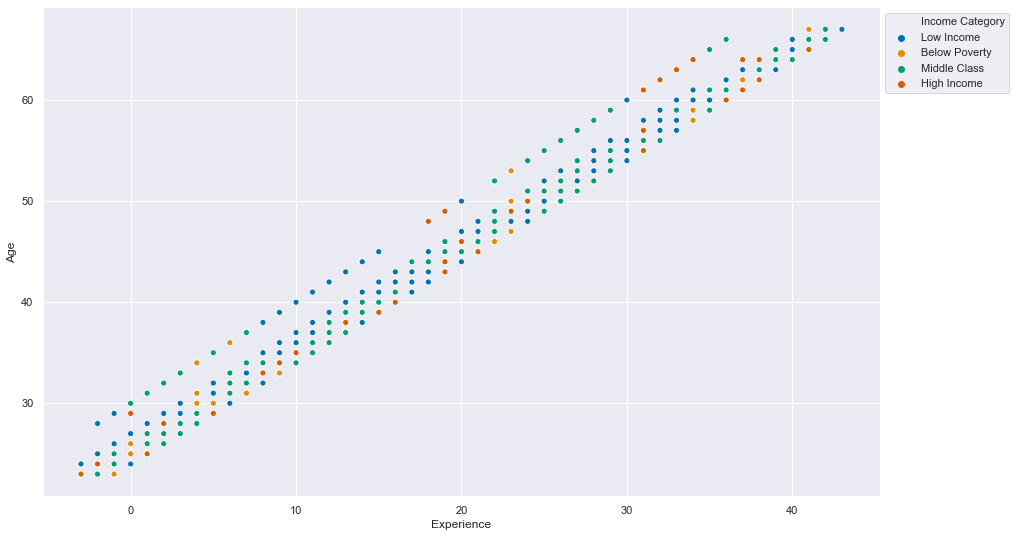

In [179]:
plt.figure(figsize=(15,9))
sns.scatterplot(x="Experience",y="Age",hue="Income Category",palette = 'colorblind', data = df)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

**Observations**

* As customer age increases, working experience is also increasing, indicating the customer's age has a very high correlation with customers working experience.

In [180]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette='colorblind')
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(15,7))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1), title = 'Personal_Loan')
    plt.show()

#### Income Category VS Personal_Loan

Personal_Loan       0    1   All
Income Category                 
Below Poverty     377    0   377
Low Income       1537    0  1537
Middle Class     2102  116  2218
High Income       504  364   868
All              4520  480  5000
------------------------------------------------------------------------------------------------------------------------


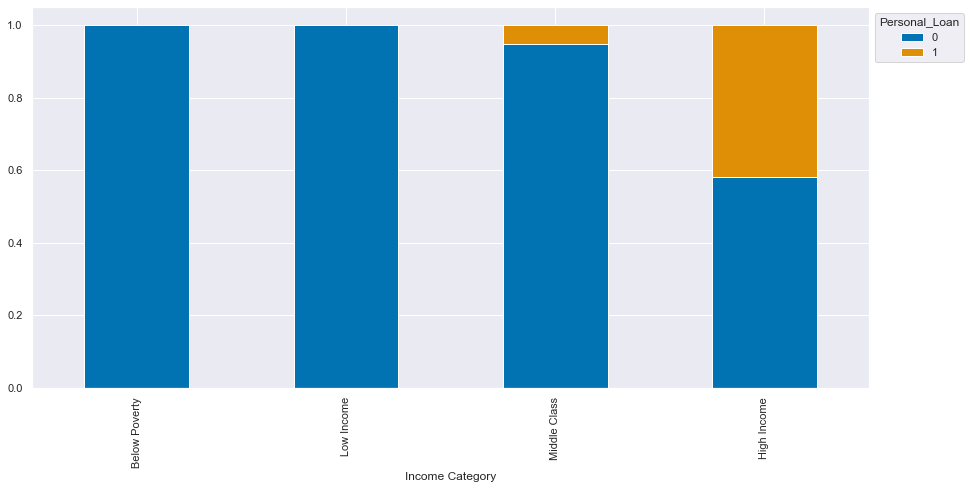

In [181]:
stacked_plot(df['Income Category'])

**Observations**

* Among all the Income categories, customers with High-income and Low-income have a 25% likelihood of accepting the bank's default personal loan. 

* It seems Low-income and Below-poverty income category customers are not interested in accepting banks' default personal loans.

#### Family VS Personal_Loan

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


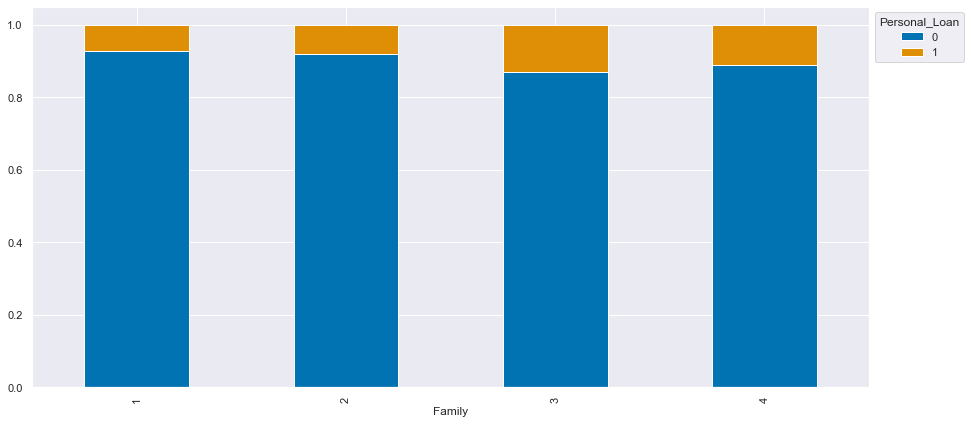

In [182]:
stacked_plot(df['Family'])

**Observations**

* Among all the customer family sizes, customers with a family size of three and four have more likelihood of accepting the bank's default personal loan than the other two family sizes.

#### Age Category VS Personal Loan

Personal_Loan     0    1   All
Age Category                  
23-35 Age      1128  134  1262
36-55 Age      2278  232  2510
46-67 Age      1102  114  1216
All            4508  480  4988
------------------------------------------------------------------------------------------------------------------------


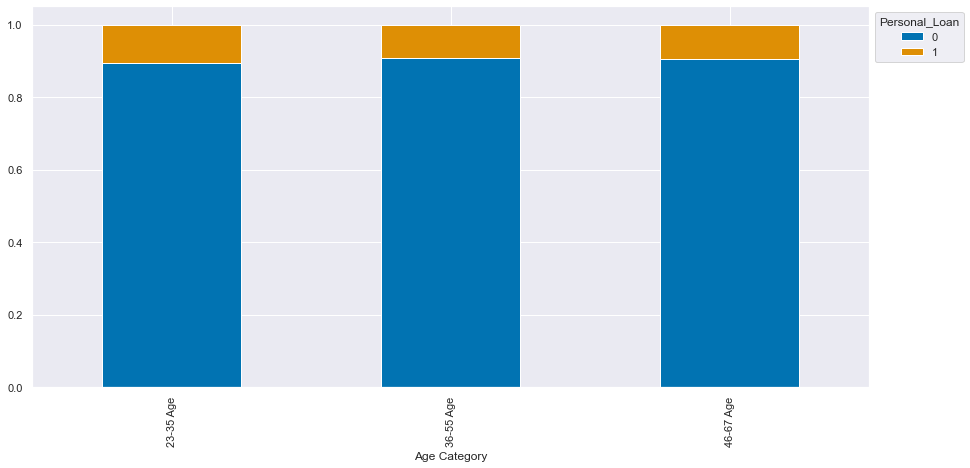

In [183]:
stacked_plot(df['Age Category'])

**Observations**

* Customers with all aged groups have around a 10% likelihood of accepting the bank's default personal loan.

#### CD_Account VS Personal Loan

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


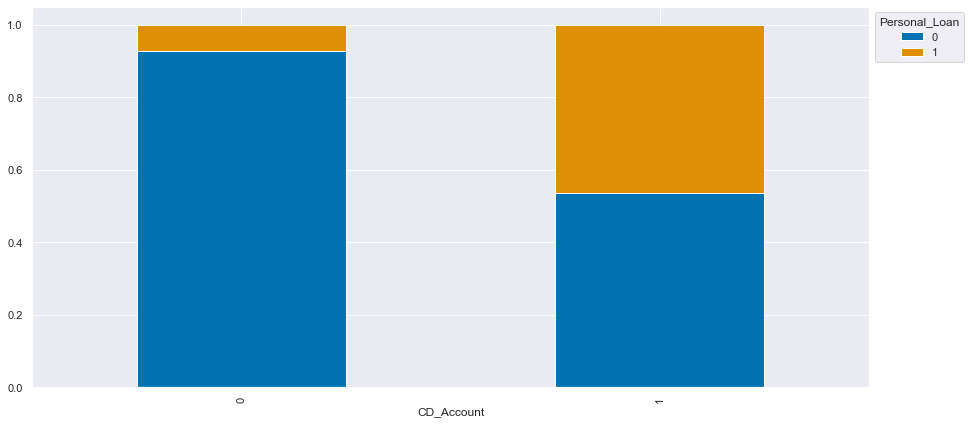

In [184]:
stacked_plot(df['CD_Account'])

**Observations**

* Customers with CD_Account in the bank have around 47% likelihood of accepting bank's default personal loan, which is higher than non CD_Account holders.

#### Securities_Account VS Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


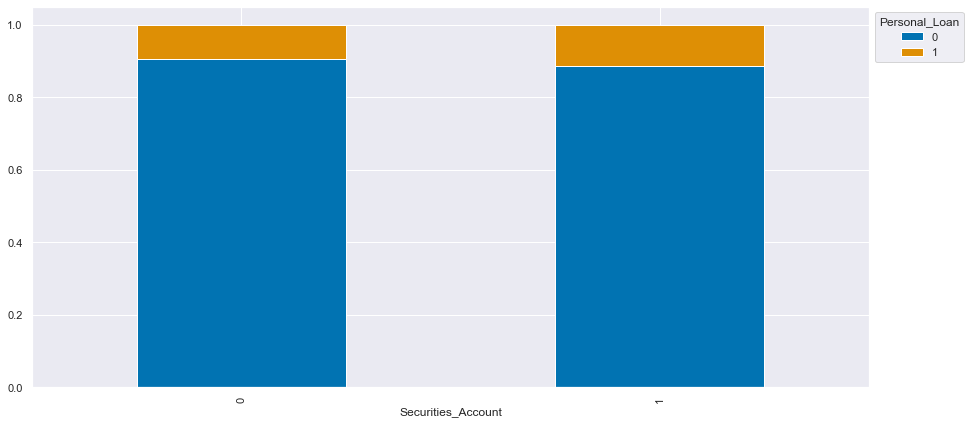

In [185]:
stacked_plot(df['Securities_Account'])

**Observations**

* Customers with Securities_Account in the bank have around 13% likelihood of accepting the bank's default personal loan, which is higher than non Securities_Account holders.

#### Credit Card VS Personal Loan

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


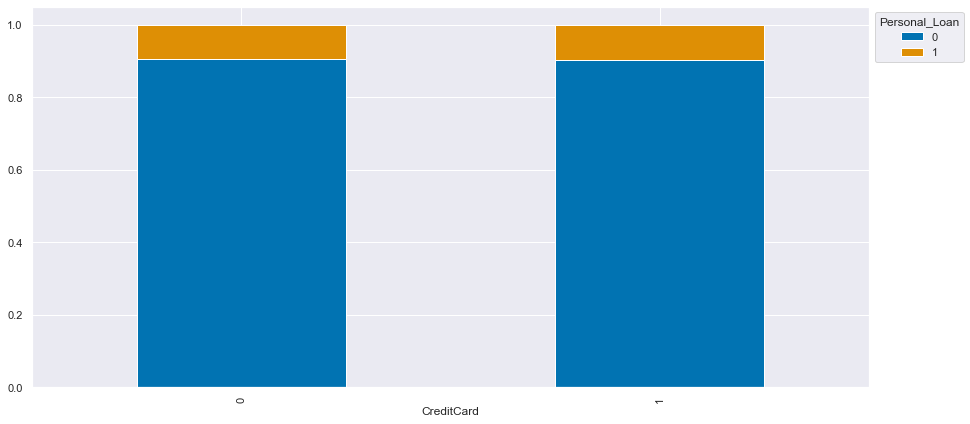

In [186]:
stacked_plot(df['CreditCard'])

**Observations**

* Customers using bank-issued credit cards and other credit card holders have an equal likelihood of accepting the bank's default personal loan.

### Fixing Outliers

In [187]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [188]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

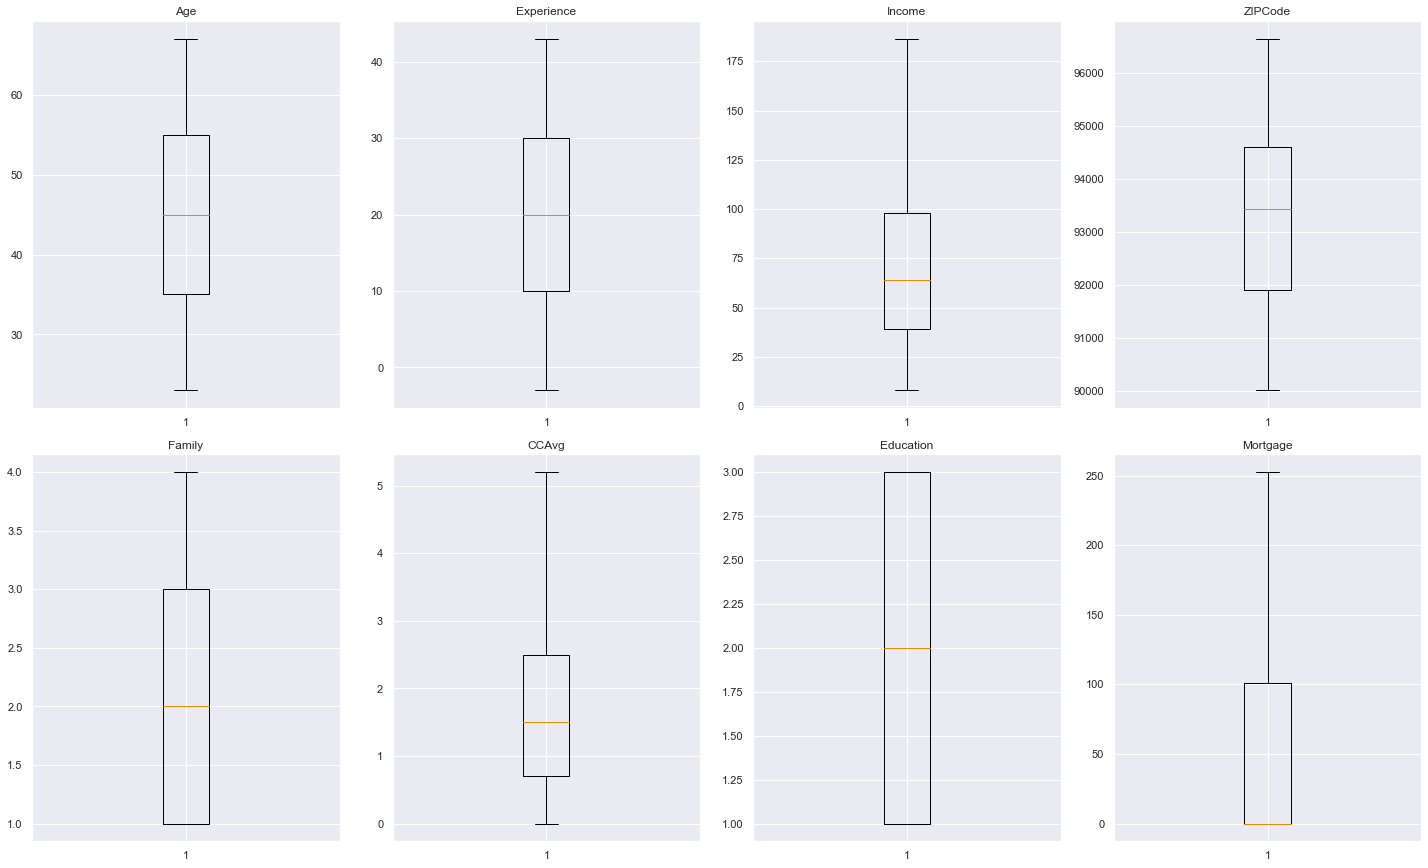

In [189]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

**Observations**

* Outliers has been treated.

### Model building - Logistic Regression

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   float64 
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
 13  Age Category        4988 non-null   category
 14  Income Category     5000 non-null   category
dtypes: category(7), float64(3), int64(5)
m

In [191]:
#Defining X and y variables
X = df.drop(['Personal_Loan','Age Category', 'Income Category','ZIPCode'], axis=1)
y = df[['Personal_Loan']]

print(X.head())
print(y.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1   49.00       4   1.60          1      0.00   
1   45          19   34.00       3   1.50          1      0.00   
2   39          15   11.00       1   1.00          1      0.00   
3   35           9  100.00       1   2.70          2      0.00   
4   35           8   45.00       4   1.00          2      0.00   

  Securities_Account CD_Account Online CreditCard  
0                  1          0      0          0  
1                  1          0      0          0  
2                  0          0      0          0  
3                  0          0      0          0  
4                  0          0      0          1  
  Personal_Loan
0             0
1             0
2             0
3             0
4             0


#### Creating Dummy Variables

In [192]:
X = pd.get_dummies(X, columns=['Securities_Account','CD_Account','Online','CreditCard'], drop_first=True)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,25,1,49.00,4,1.60,1,0.00,1,0,0,0
1,45,19,34.00,3,1.50,1,0.00,1,0,0,0
2,39,15,11.00,1,1.00,1,0.00,0,0,0,0
3,35,9,100.00,1,2.70,2,0.00,0,0,0,0
4,35,8,45.00,4,1.00,2,0.00,0,0,0,1


In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Experience            5000 non-null   int64  
 2   Income                5000 non-null   float64
 3   Family                5000 non-null   int64  
 4   CCAvg                 5000 non-null   float64
 5   Education             5000 non-null   int64  
 6   Mortgage              5000 non-null   float64
 7   Securities_Account_1  5000 non-null   uint8  
 8   CD_Account_1          5000 non-null   uint8  
 9   Online_1              5000 non-null   uint8  
 10  CreditCard_1          5000 non-null   uint8  
dtypes: float64(3), int64(4), uint8(4)
memory usage: 293.1 KB


#### Split the data in to train and test

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [195]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train, y_train)

D:\Installations\anaconda3\envs\py36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

#### Model Performances

**Prediction on train**

In [196]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
#mat_train = confusion_matrix(y_train,pred_train)


def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_actual,y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

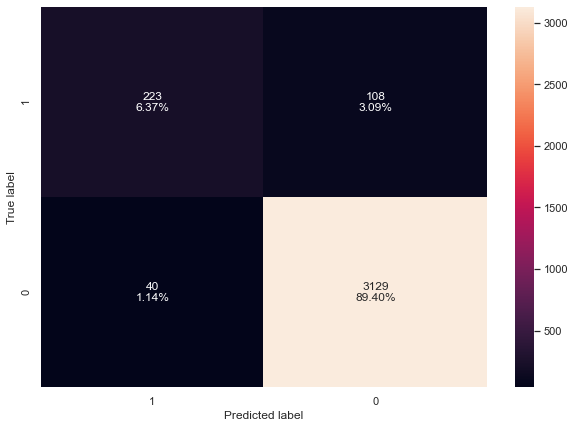

In [197]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train)

**Prediction on test set**

confusion matrix = 



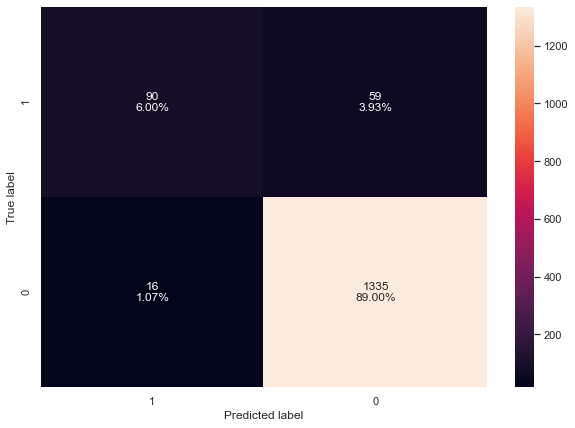

In [198]:
#Predict for test set
pred_test = logreg.predict(X_test)


print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

**Accuracy**

In [199]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))


Accuracy on train data: 0.9577142857142857
Accuracy on test data: 0.95


**AUC ROC curve**

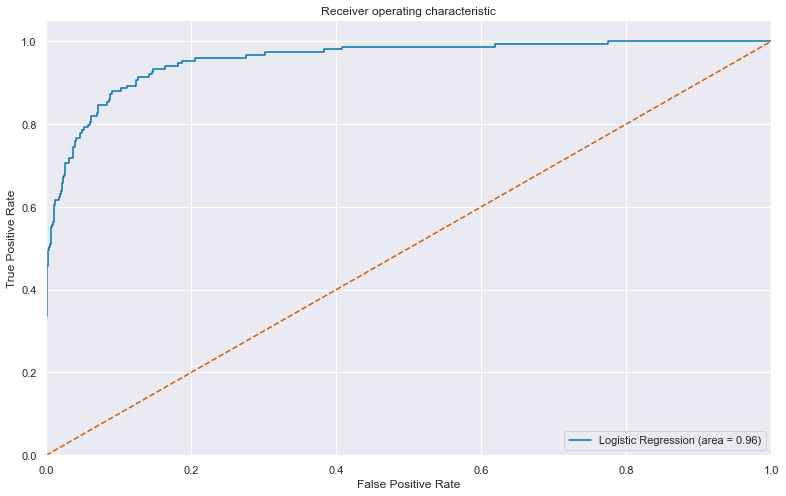

In [200]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Optimal threshold**

In [201]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.0966438119767567


In [202]:
target_names = ['Accept', 'Reject']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

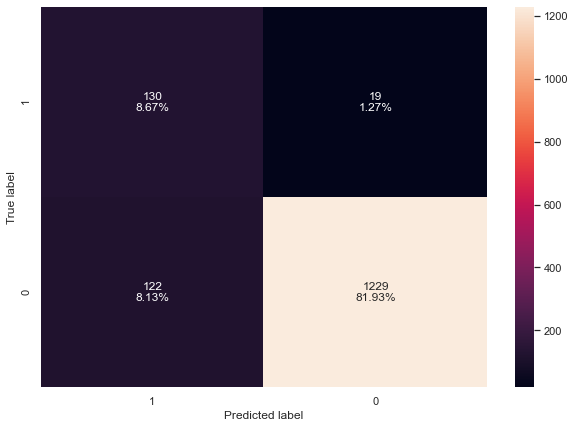

In [203]:
make_confusion_matrix(y_test,y_pred_ts)

In [204]:
#Accuracy with optimal threhold
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y_test, y_pred_ts))

Accuracy on train data: 0.9022857142857142
Accuracy on test data: 0.906


**Observatons**

* After using optimal threshold we see that true positives have increased from 6.37% to 8.67%. and false positive has decreased from 3.09% to 1.27%

### Check for multicollinearity by Variance Inflation Factor (VIF Score)

In [205]:
# dataframe with numerical column only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [206]:
num_feature_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 5000 non-null   float64
 1   Age                   5000 non-null   int64  
 2   Experience            5000 non-null   int64  
 3   Income                5000 non-null   float64
 4   Family                5000 non-null   int64  
 5   CCAvg                 5000 non-null   float64
 6   Education             5000 non-null   int64  
 7   Mortgage              5000 non-null   float64
 8   Securities_Account_1  5000 non-null   uint8  
 9   CD_Account_1          5000 non-null   uint8  
 10  Online_1              5000 non-null   uint8  
 11  CreditCard_1          5000 non-null   uint8  
dtypes: float64(4), int64(4), uint8(4)
memory usage: 332.2 KB


In [207]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                  453.41
Age                     93.70
Experience              93.61
Income                   1.80
Family                   1.03
CCAvg                    1.70
Education                1.11
Mortgage                 1.02
Securities_Account_1     1.14
CD_Account_1             1.33
Online_1                 1.04
CreditCard_1             1.11
dtype: float64



**Observations**

* Age and Experience variables have a very high VIF score which indicated perfect collinearity. 


**Will check again VIF scores by dropping Experience variable first**

In [208]:
# droping variables of perfect collinearity
num_feature_set = num_feature_set.drop('Experience', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                  35.37
Age                     1.01
Income                  1.80
Family                  1.03
CCAvg                   1.69
Education               1.04
Mortgage                1.02
Securities_Account_1    1.14
CD_Account_1            1.33
Online_1                1.04
CreditCard_1            1.11
dtype: float64



**Observations**

* After dropping of variable ‘Experience’, VIF has come down to quite a reasonable limit, now we can say features are not correlated.


### Build the logistic regression model 

**Split into training and test set**

In [209]:
Y = df[['Personal_Loan']]
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30)

**Building Logistic Regression model from statsmodels**

In [210]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

print(lg.summary())

# Let's Look at Model Performance
y_pred = lg.predict(X_train) 
pred_train = list(map(round, y_pred))

y_pred1 = lg.predict(X_test) 
pred_test = list(map(round, y_pred1))

print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:',recall_score(y_test, pred_test))


Optimization terminated successfully.
         Current function value: 0.119024
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Fri, 19 Mar 2021   Pseudo R-squ.:                  0.6213
Time:                        01:59:58   Log-Likelihood:                -416.59
converged:                       True   LL-Null:                       -1100.0
Covariance Type:            nonrobust   LLR p-value:                1.479e-287
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.9512      0.893    -16.737      0.000     -16.702     -13.200

**Observations**

* Mortgagde has p-value 0.096 which is > 0.05, which is insigificant.

#### Drop Mortgage feature

In [211]:
#Mortgage has highest p values among those with p-value greater than 0.05
X_train1 = X_train.drop('Mortgage', axis =1)
X_test1 = X_test.drop('Mortgage',axis =1)

logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance
y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.119129
         Iterations 9
                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.621      
Dependent Variable:   Personal_Loan      AIC:                853.9025   
Date:                 2021-03-19 01:59   BIC:                915.5076   
No. Observations:     3500               Log-Likelihood:     -416.95    
Df Model:             9                  LL-Null:            -1100.0    
Df Residuals:         3490               LLR p-value:        1.6785e-288
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       9.0000                                            
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
const                -14.8941   0.8889 -16.7549 0.0

### Let's use model 'lg1' for making interpretations
* As per lg1, Age, Income, Fammily, CCAvg, Education, Securities_Account, CD_Account, Online and CreditCard are important v variables here
* Securities_Account, Online and Creditcard variables have negative signs, i.e.increase in these will lead to an decrease in chances of accepting the loan by default.

* Please note that when coefficient is b , than change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)


#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [212]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg1.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg1.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [213]:
# FIlter by significant p-value (pval <0.05) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
CD_Account_1,4.07,58.52,0.98,0.00
Education,1.76,5.81,0.85,0.00
Family,0.78,2.19,0.69,0.00
CCAvg,0.32,1.38,0.58,0.00
Income,0.06,1.06,0.51,0.00
Online_1,-0.66,0.51,0.34,0.00
Securities_Account_1,-0.88,0.41,0.29,0.01
CreditCard_1,-1.41,0.24,0.20,0.00
const,-14.89,0.00,0.00,0.00


**Lets look at most significant variable**

In [214]:
# we are looking are overall significant varaible
pval_filter = lgcoef['pval']<=0.0001
imp_vars = lgcoef[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant varaibles category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant varaibles  are '+end,':\n',sig_var)

Most significant varaibles category wise are :
 ['CD_Account_1', 'Education', 'Family', 'CCAvg', 'Income', 'CreditCard_1', 'const']
************************************************************************************************************************
Most overall significant varaibles  are  :
 ['CD_Account', 'CreditCard']


### Prediction of the model


**Prediction on Train data**

In [215]:
# Let's Look at Model Performance
y_pred = lg1.predict(X_train1) 
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1) 
pred_test = list(map(round, y_pred1))

In [216]:
#Model performance with 0.5 threshold

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9577142857142857
Accuracy on test data: 0.952
Recall on train data: 0.6726726726726727
Recall on test data: 0.6326530612244898
Precision on train data: 0.8517110266159695
Precision on test data: 0.8378378378378378
f1 score on train data: 0.7516778523489932
f1 score on test data: 0.7209302325581396


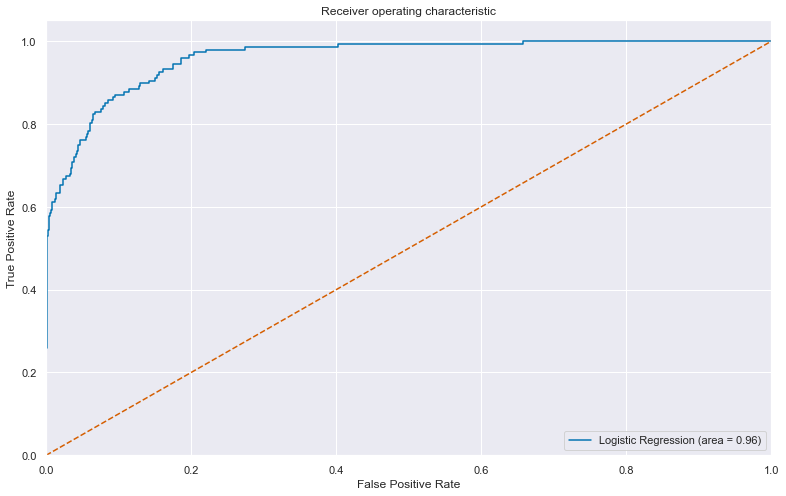

In [217]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Try to improve Recall using AUC-ROC curve

In [218]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.09725173182532164


In [219]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

In [220]:
#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.904
Accuracy on test data: 0.8986666666666666
Recall on train data: 0.9039039039039038
Recall on test data: 0.8571428571428571
Precision on train data: 0.4975206611570248
Precision on test data: 0.490272373540856
f1 score on train data: 0.6417910447761194
f1 score on test data: 0.6237623762376238


* Recall has improved to quite good extent.

### Now Let's use Precision-Recall curve and see if we can find a better threshold

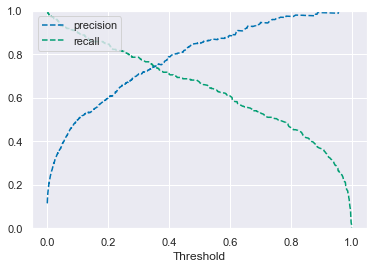

In [221]:
from sklearn.metrics import precision_recall_curve

y_scores=lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* Decreasing threshold beyond 0.3 will lead to fast decrease in Precision, which will lead to great loss of opportunity, so let's consider threshold of 0.3.

### Check Model Performance

In [222]:
optimal_threshold = 0.3

# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9482857142857143
Accuracy on test data: 0.9386666666666666
Recall on train data: 0.7867867867867868
Recall on test data: 0.7074829931972789
Precision on train data: 0.7043010752688172
Precision on test data: 0.6797385620915033
f1 score on train data: 0.7432624113475178
f1 score on test data: 0.6933333333333332


* The previous model was better, where we chose optimal threshold using AUC-ROC curve

### Make confusion matrix

In [223]:
from sklearn.metrics import classification_report,confusion_matrix



def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



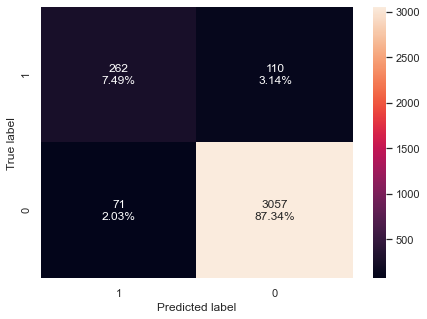

In [224]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train_opt)

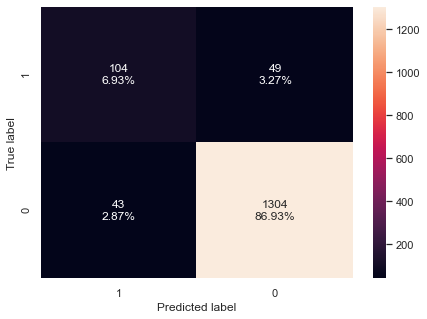

In [225]:
# let us make confusion matrix on test set
make_confusion_matrix(y_test,pred_test_opt)

### Insights

* The accuracy after using precision-recall curve has decreased from 85.7% to 70.7%
* After choosing optimal threshold using AUC-ROC we see 8.67% as true positives
* Six Most important varaibles from SFS methods are:
  - 'CD_Account_1', 
  - 'Education', 
  - 'Family',
  - 'CCAvg',
  - 'Income', 
  - 'CreditCard_1'

### Conclusion
- The logistic regression model with multicollinaerity removed is best model

## Model Building - Decision Tree

In [226]:
#Defining X and y variables
xd = df.drop(['Personal_Loan','Age Category', 'Income Category','ZIPCode'], axis=1)
yd = df[['Personal_Loan']]

print(xd.head())
print(yd.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1   49.00       4   1.60          1      0.00   
1   45          19   34.00       3   1.50          1      0.00   
2   39          15   11.00       1   1.00          1      0.00   
3   35           9  100.00       1   2.70          2      0.00   
4   35           8   45.00       4   1.00          2      0.00   

  Securities_Account CD_Account Online CreditCard  
0                  1          0      0          0  
1                  1          0      0          0  
2                  0          0      0          0  
3                  0          0      0          0  
4                  0          0      0          1  
  Personal_Loan
0             0
1             0
2             0
3             0
4             0


In [227]:
# encoding the categorical variables
xd = pd.get_dummies(xd, drop_first=True)
xd.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,25,1,49.00,4,1.60,1,0.00,1,0,0,0
1,45,19,34.00,3,1.50,1,0.00,1,0,0,0
2,39,15,11.00,1,1.00,1,0.00,0,0,0,0
3,35,9,100.00,1,2.70,2,0.00,0,0,0,0
4,35,8,45.00,4,1.00,2,0.00,0,0,0,1


In [228]:
xdtrain, xdtest, ydtrain, ydtest = train_test_split(xd, yd, test_size=0.4 , random_state=1)

In [229]:
print(xdtrain.shape)
print(xdtest.shape)
print(ydtrain.shape)
print(ydtest.shape)

(3000, 11)
(2000, 11)
(3000, 1)
(2000, 1)


#### Building model using the DecisionTreeClassifier function. Using default 'gini' criteria to split

In [230]:
yd['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [231]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(xdtrain, ydtrain)

DecisionTreeClassifier(random_state=1)

### Scoring Decision Tree

In [232]:
# accuracy on training set
print("Accuracy on train set", model.score(xdtrain,ydtrain))

# accuracy on test set
print("Accuracy on test set", model.score(xdtest,ydtest))

Accuracy on train set 1.0
Accuracy on test set 0.979


In [233]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(xdtest)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

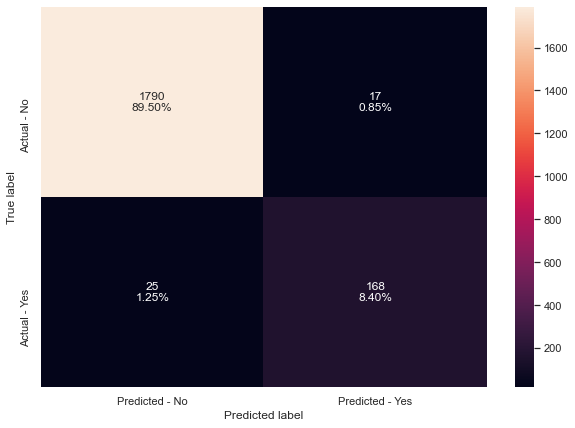

In [234]:
make_confusion_matrix(model,ydtest)

In [235]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(xdtrain)
    pred_test = model.predict(xdtest)
    print("Recall on training set : ",metrics.recall_score(ydtrain,pred_train))
    print("Recall on test set : ",metrics.recall_score(ydtest,pred_test))

In [236]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8704663212435233


**Observations**

* Recall on training and test set is very good.

### Visualizing the Decision Tree

In [237]:
column_names = list(xd.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


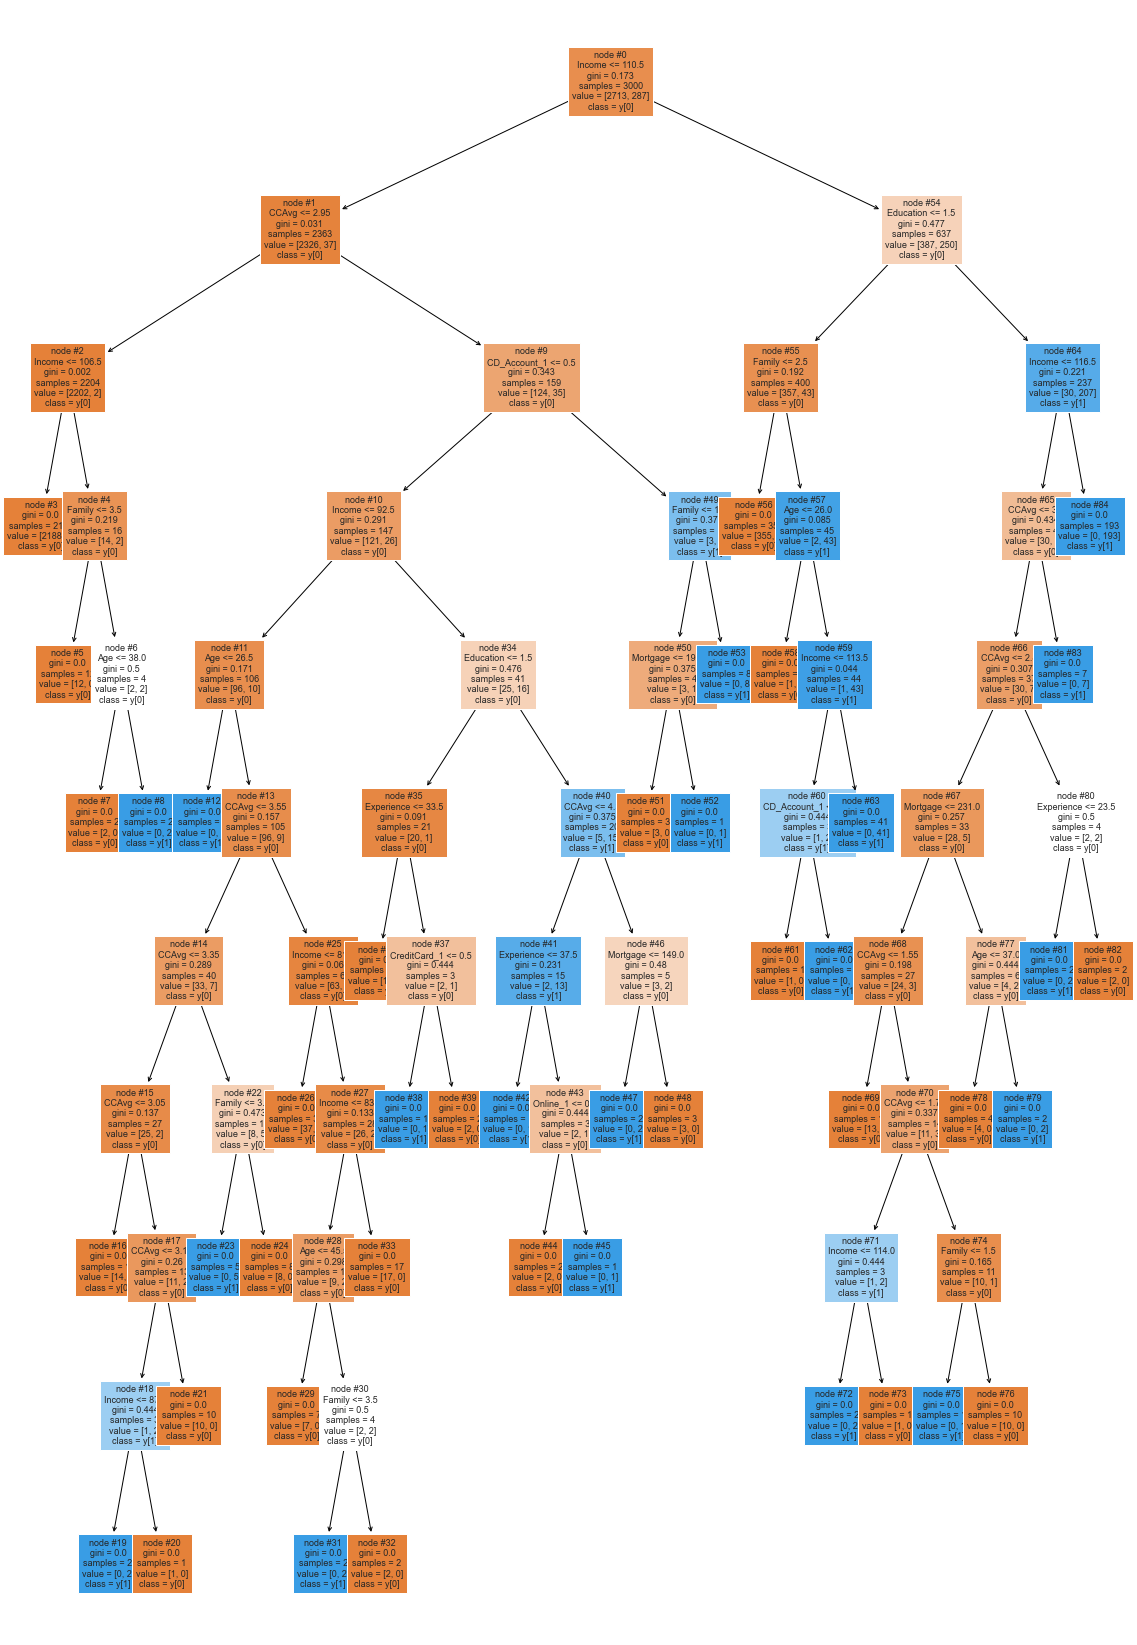

In [238]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [239]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2188.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 38.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Age >  38.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |   |   |   |

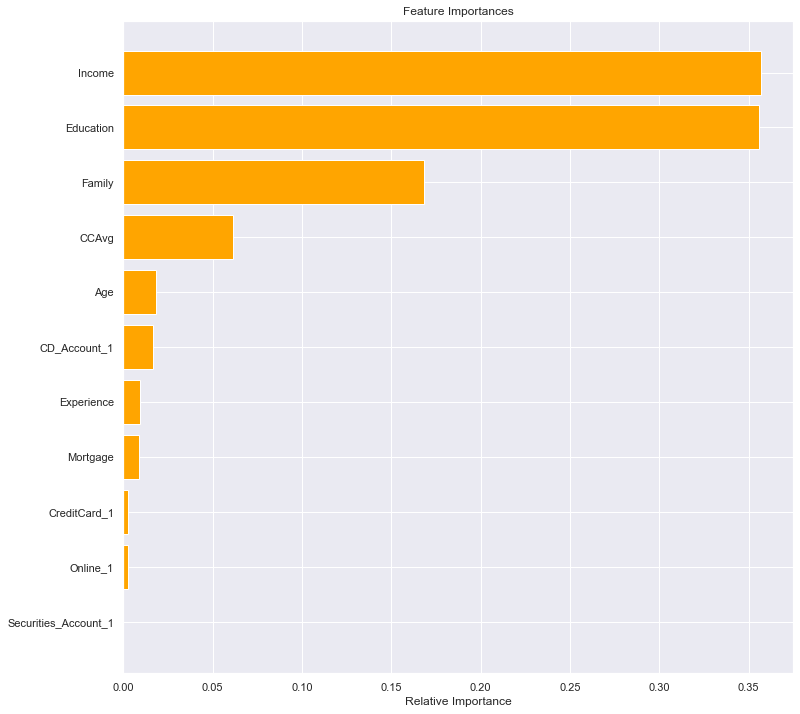

In [240]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**

* Income, Education and Family are the top 3 important features.

### Using GridSearch for Hyperparameter tuning of our tree model 


In [241]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(xdtrain, ydtrain)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(xdtrain, ydtrain)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=10,
                       random_state=1)

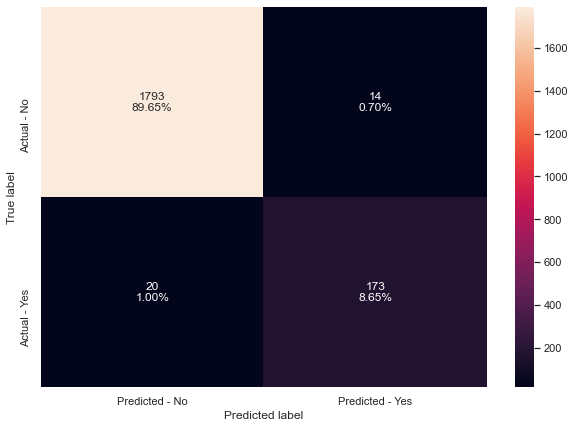

In [242]:
make_confusion_matrix(estimator,ydtest)

In [243]:
get_recall_score(estimator)

Recall on training set :  0.9372822299651568
Recall on test set :  0.8963730569948186


In [244]:
column_names = list(xd.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


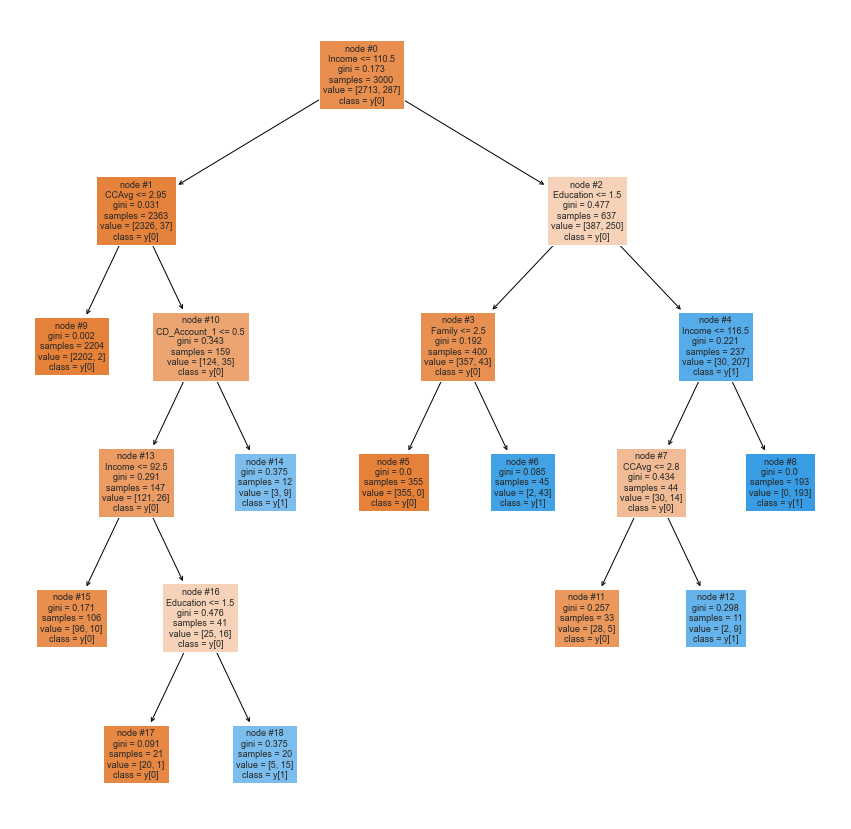

In [245]:
plt.figure(figsize=(15,15))

out1 = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out1:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

### Cost Complexity Pruning

In [246]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(xdtrain, ydtrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [247]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.01
6,0.00,0.01
7,0.00,0.01
8,0.00,0.01
9,0.00,0.01


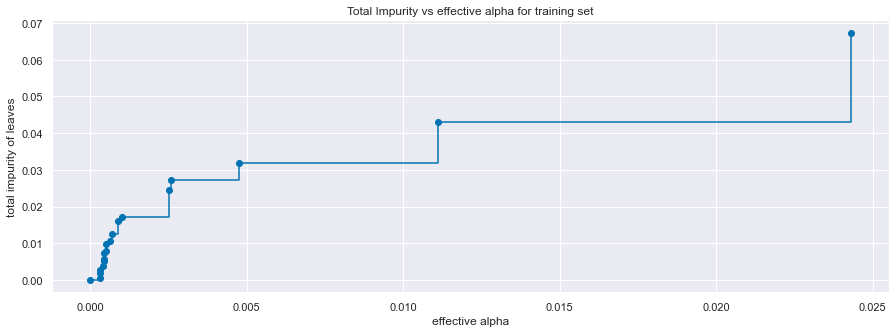

In [248]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [249]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(xdtrain, ydtrain)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05284766110239135


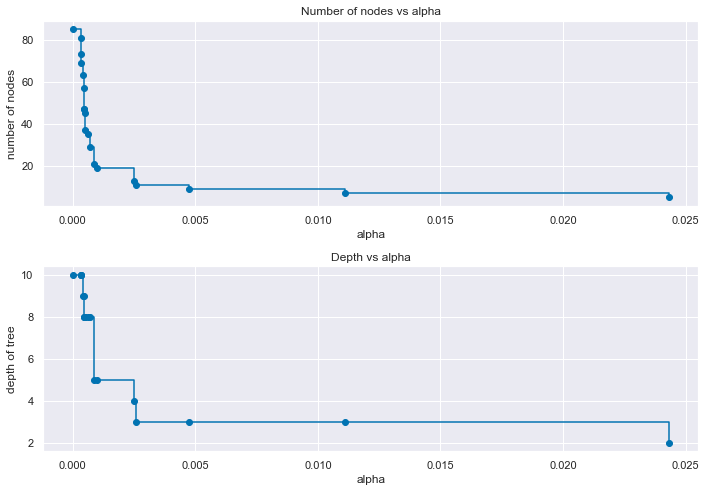

In [250]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [251]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(xdtrain)
    values_train=metrics.recall_score(ydtrain,pred_train3)
    recall_train.append(values_train)

In [252]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(xdtest)
    values_test=metrics.recall_score(ydtest,pred_test3)
    recall_test.append(values_test)

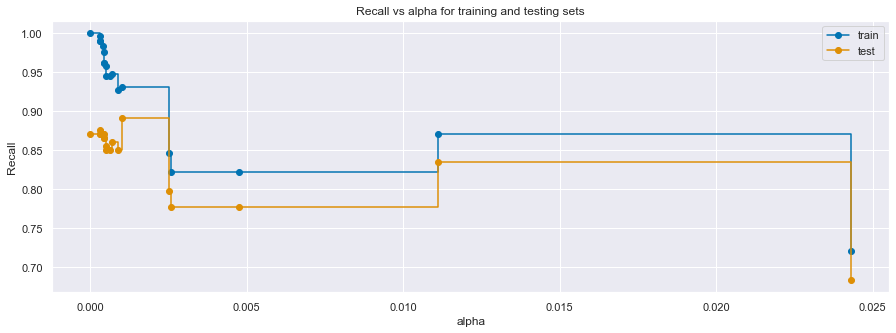

In [253]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.024 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.002 retaining information and getting higher recall.**

In [254]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=1)


In [255]:
get_recall_score(best_model)

Recall on training set :  0.9303135888501742
Recall on test set :  0.8911917098445595


### Confusion Matrix

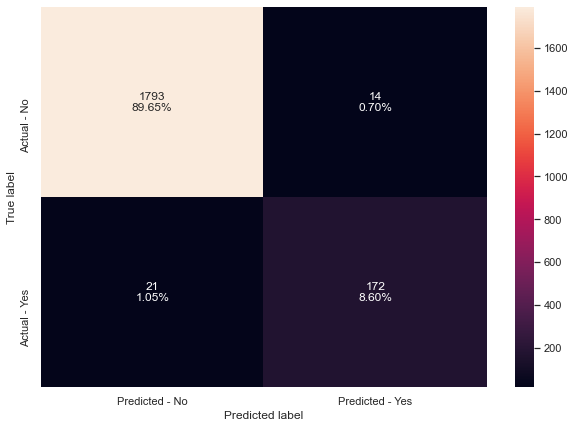

In [256]:
make_confusion_matrix(best_model,ydtest)

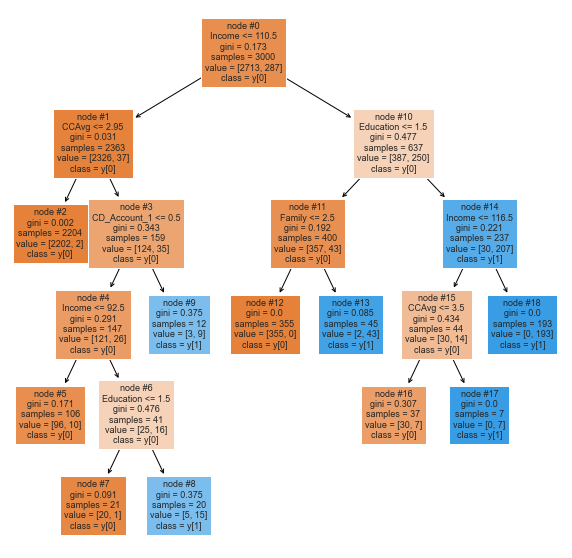

In [257]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [261]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2202.00, 2.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- weights: [96.00, 10.00] class: 0
|   |   |   |--- Income >  92.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [20.00, 1.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [5.00, 15.00] class: 1
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 9.00] class: 1
|--- Income >  110.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [355.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [2.00, 43.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 3.50
|   |   |   |   |--- weights: [30.00, 7.00] class: 0
|   |   |   |--- CCAvg >  3.50
|   |   |   |   |--- weights: [0.00, 7.00] class: 1
|   |   |--- Income >  116.50

In [258]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = xdtrain.columns).sort_values(by = 'Imp', ascending = False))

                      Imp
Education            0.39
Income               0.39
Family               0.16
CCAvg                0.05
CD_Account_1         0.02
Age                  0.00
Experience           0.00
Mortgage             0.00
Securities_Account_1 0.00
Online_1             0.00
CreditCard_1         0.00


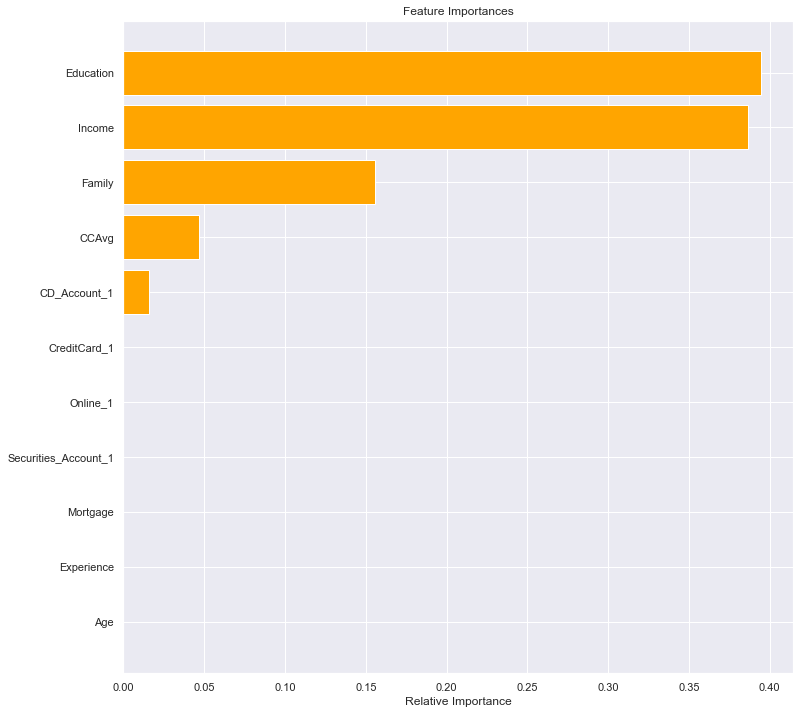

In [259]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparing all the decision tree models

In [260]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.90,1,0.93], 'Test_Recall':[0.89,1,0.92]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.90,0.89
1,Decision treee with hyperparameter tuning,1.00,1.00
2,Decision tree with post-pruning,0.93,0.92


**Decision tree with post-pruning is giving the highest recall on the test set, even though we got recall as 1 with hyperparameter tuning but that model wasn't a generalized one**

### Conclusions

* Analyzed the "All Life Bank personal loan acceptence" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
* The model built can be used to predict if a customer is going to accept default personal loan or not.
* Visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
* Verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
* Education, Income, Family, CCAvg and CD_Account  are the most important variable in predicting the customers that will accept the default personal loan.
* Established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

* According to the decision tree model - 

    a) If a customer Income < 92.5K there's a very high chance the customer will not accept the personal loan.

    b) If a customer Income < 92.5K and CCAvg > 2.95k per month then there is a very high chance that the customer is going to accept the personal loan.
    

* It is observed that the the customers with family size of 3 are more likelihood of them accepting the personal loan than other family sizes.

* Offer best interest rates on loans to the customers to attract more.
